## 17. Undirected Graphs and Conditional Independence

$k$ binary variables $Y_1, \dots, Y_k$ correspond to a multinomial with $N = 2^k$ categories.  Even for moderately large $k$, $2^k$ will be huge.  It can be shown in this case that the MLE is a poor estimator, because the data are **sparse**.

Graphical models often require fewer parameters and may lead to estimators with smaller risk.  There are two main types of graphical models:  undirected and directed.  Here we introduce undirected graphs.

### 17.1 Conditional Independence

Let $X$, $Y$, $Z$ be discrete random variables.  We say that $X$ and $Y$ are **conditionally independent given $Z$**, written  $X \text{⫫} Y \;|\; Z$, if

$$ \mathbb{P}(X = x, Y = y | Z = z) = \mathbb{P}(X = x | Z = z) \mathbb{P}(Y = y | Z = z)$$

for all $x$, $y$, $z$.  If $X$, $Y$, $Z$ are continuous random variables, we say that $X$ and $Y$ are conditionally independent given $Z$ if

$$ f_{X, Y | Z}(x, y | z) = f_{X | Z}(x | z) f_{Y | Z}(y | z) $$

for all $x$, $y$, $z$.

Intuitively, this means that once you know $Z$, $Y$ provides no extra information about $X$.

**Theorem 17.2**.  The following implications hold:

$$
\begin{align}
X \text{ ⫫ } Y \;|\; Z & \Longrightarrow Y \text{ ⫫ } X \;|\; Z \\
X \text{ ⫫ } Y \;|\; Z \; \text{and} \; U = h(X) & \Longrightarrow U \text{ ⫫ } Y \;|\; Z \\
X \text{ ⫫ } Y \;|\; Z \; \text{and} \; U = h(X) & \Longrightarrow X \text{ ⫫ } Y \;|\; (Z, U)  \\
X \text{ ⫫ } Y \;|\; Z \; \text{and} \; X \text{ ⫫ } W \;|\; (Y, Z) & \Longrightarrow X \text{ ⫫ } (W, Y) \;|\; Z \\
X \text{ ⫫ } Y \;|\; Z \; \text{and} \; X \text{ ⫫ } Z \;|\; Y \; & \Longrightarrow Y \text{ ⫫ } (Y, Z)
\end{align}
$$

The last property requires the assumption that all events have positive probability; the first four do not.

### 17.2 Undirected Graphs

An **undirected graph** $\mathcal{G} = (V, E)$ has a finite set $V$ of **vertices** (or **nodes**) and a set $E$ of **edges** (or **arcs**) consisting of pairs of vertices.  The vertices correspond to random variables $X, Y, Z, \dots$ and the edges are written as unordered pairs.  For example, $(X, Y) \in E$ means that $X$ and $Y$ are joined by an edge.

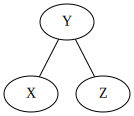

In [1]:
from graphviz import Graph

g = Graph()

g.edge('Y', 'X')
g.edge('Y', 'Z')

g

*A graph with vertices $V = \{X, Y, Z\}$.  The edge set is $E = \{(X, Y), (Y, Z)\}$.*

Two vertices are **adjacent**, written $X \sim Y$, if there is an edge between them.  A sequence $X_0, \dots, X_n$ is called a **path** if $X_{i-1} \sim X_i$ for each $i$.  A graph is **complete** if there is an edge between every pair of vertices.  A subset $U \subset V$ of vertices together with their edges is called a **subgraph**.

If $A$, $B$ and $C$ are three distinct subsets in $V$, we say that **$C$ separates $A$ and $B$** if every path from a variable in $A$ to a variable in $B$ intersects a variable in $C$.

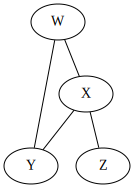

In [2]:
from graphviz import Graph

g = Graph()

g.edge('W', 'X')
g.edge('W', 'Y')
g.edge('X', 'Z')
g.edge('X', 'Y')

g

*$\{Y, W\}$ and $\{Z\}$ are separated by $\{X\}$.  Also, $W$ and $Z$ are separated by $\{X, Y\}$.*

### 17.3 Probability and Graphs

Let $V$ be a set of random variables with distribution $\mathbb{P}$.  Construct a graph with one vertex for each random variable in $V$.  Suppose we omit the edge between a pair of variables if they are independent given the rest of the variables:

$$ \text{no edge between } X \text{ and } Y \Leftrightarrow X \text{⫫} Y \;|\; \text{rest} $$

where "rest" refers to all the other variables besides $X$ and $Y$.  This type of graph is called a **pairwise Markov graph**.

The graph encodes a set of pairwise conditional independence relations.  These relations imply other conditional independence relations.  Fortunately we can read these other conditional independence relations from the graph as well, as is explained in the next theorem.

**Theorem 17.3**.  Let $\mathcal{G} = (V, E)$ be a pairwise Markov graph for a distribution $\mathbb{P}$.  Let $A$, $B$, and $C$ be distinct subsets of $V$ such that $C$ separates $A$ and $B$.  Then $A \text{ ⫫ } B \;|\; C$.

Remark:  if $A$ and $B$ are not connected, we can regard them as separated by the empty set.  Then it follows from the theorem that $A \text{ ⫫ } B$.

The independence property in Theorem 17.3 is called the **global Markov property**.  We thus see that the pairwise and global Markov properties are equivalent.

More precisely:  given a graph $\mathcal{G}$, 

- Let $M_\text{pair}(\mathcal{G})$ be the set of distributions that satisfy the pairwise Markov property; thus $\mathbb{P} \in M_\text{pair}(\mathcal{G})$ if, under $\mathbb{P}$, $X \text{⫫} Y \;|\; \text{rest}$ if and only if there is no edge between $X$ and $Y$.
- Let $M_\text{global}(\mathcal{G})$ be the set of distributions that satisfy the global Markov property; thus $\mathbb{P} \in M_\text{global}(\mathcal{G})$ if, under $\mathbb{P}$,  $A \text{⫫} B \;|\; C$ if and only if $C$ separates $A$ and $B$.

**Theorem 17.5**. Let $\mathcal{G}$ be a graph.  Then $M_\text{pair}(\mathcal{G}) = M_\text{global}(\mathcal{G})$.

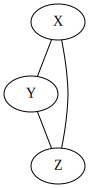

In [3]:
from graphviz import Graph

g = Graph()

g.edge('X', 'Y')
g.edge('Y', 'Z')
g.edge('Z', 'X')

g

*No implied independence relations*

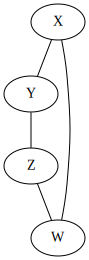

In [4]:
from graphviz import Graph

g = Graph()

g.edge('X', 'Y')
g.edge('Y', 'Z')
g.edge('Z', 'W')
g.edge('W', 'X')

g

*$X \text{ ⫫ } Z \;|\; \{Y, W\}$ and $Y \text{ ⫫ } W \;|\; \{X, Z\}$*

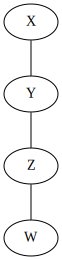

In [5]:
from graphviz import Graph

g = Graph()

g.edge('X', 'Y')
g.edge('Y', 'Z')
g.edge('Z', 'W')

g

*$X \text{ ⫫ } Z \;|\; Y$ and $Y \text{ ⫫ } W \;|\; Z$*

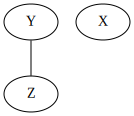

In [6]:
from graphviz import Graph

g = Graph()

g.edge('Y', 'Z')
g.node('X')

g

*$X \text{ ⫫ } Y$, $X \text{ ⫫ } Z$ and $X \text{ ⫫ } (Y, Z)$*

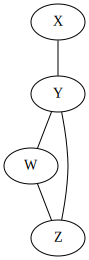

In [7]:
from graphviz import Graph

g = Graph()

g.edge('Y', 'W')
g.edge('W', 'Z')
g.edge('Z', 'Y')
g.edge('X', 'Y')

g

*$X \text{ ⫫ } W | (Y, Z)$ and $X \text{ ⫫ } Z | Y$*

### 17.4  Fitting Graphs to Data

Given a dataset, how do we find a graphical model that fits the data?  Some authors have devoted whole books to this subject.  We will only treat the discrete case and we will consider a method based on **log-linear models** which are the subject of the next chapter.

### 17.6 Exercises

**Exercise 17.6.1**.  Consider random variables $(X_1, X_2, X_3)$.  In each of the following cases, draw a graph that has the given independence relations.

**(i)** $X_1 \text{ ⫫ } X_3 | X_2$

**(ii)** $X_1 \text{ ⫫ } X_2 | X_3$ and $X_1 \text{ ⫫ } X_3 | X_2$

**(iii)** $X_1 \text{ ⫫ } X_2 | X_3$ and $X_1 \text{ ⫫ } X_3 | X_2$ and $X_2 \text{ ⫫ } X_3 | X_1$

**Solution**

**(i)** $X_1 \text{ ⫫ } X_3 | X_2$

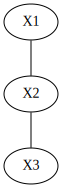

In [8]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')

g

**(ii)** $X_1 \text{ ⫫ } X_2 | X_3$ and $X_1 \text{ ⫫ } X_3 | X_2$

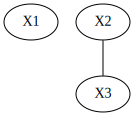

In [9]:
from graphviz import Graph

g = Graph()

g.node('X1')
g.edge('X2', 'X3')

g

**(iii)** $X_1 \text{ ⫫ } X_2 | X_3$ and $X_1 \text{ ⫫ } X_3 | X_2$ and $X_2 \text{ ⫫ } X_3 | X_1$

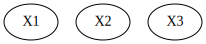

In [10]:
from graphviz import Graph

g = Graph()

g.node('X1')
g.node('X2')
g.node('X3')

g

**Exercise 17.6.2**.  Consider random variables $(X_1, X_2, X_3, X_4)$.  In each of the following cases, draw a graph that has the given independence relations.

**(a)** $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_1 \text{ ⫫ } X_4 |  X_2, X_3 $ and $X_2 \text{ ⫫ } X_4 |  X_1, X_3 $

**(b)** $X_1 \text{ ⫫ } X_2 |  X_3, X_4 $ and $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_2 \text{ ⫫ } X_3 |  X_1, X_4 $

**(c)** $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_2 \text{ ⫫ } X_4 |  X_1, X_3 $

**Solution**

**(a)** $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_1 \text{ ⫫ } X_4 |  X_2, X_3 $ and $X_2 \text{ ⫫ } X_4 |  X_1, X_3 $

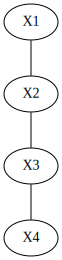

In [11]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')

g

**(b)** $X_1 \text{ ⫫ } X_2 |  X_3, X_4 $ and $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_2 \text{ ⫫ } X_3 |  X_1, X_4 $

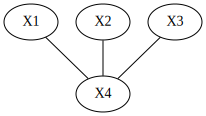

In [12]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X4')
g.edge('X2', 'X4')
g.edge('X3', 'X4')

g

**(c)** $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ and $X_2 \text{ ⫫ } X_4 |  X_1, X_3 $

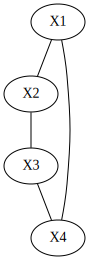

In [13]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')
g.edge('X1', 'X4')

g

**Exercise 17.6.3**.  A conditional independence between a pair of variables is **minimal** if it is not possible to use the Separation Theorem to eliminate any variable from the conditioning set, i.e. from the right side of the bar (Whittaker 1990).  Write down the minimal conditioning independences from the given figures.

**(a)**

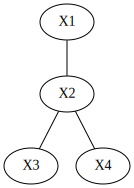

In [14]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X2', 'X4')

g

**(b)**

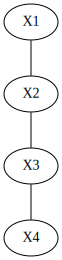

In [15]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')

g

**(c)**

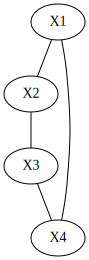

In [16]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')
g.edge('X4', 'X1')

g

**(d)**

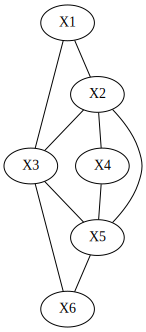

In [17]:
from graphviz import Graph

g = Graph()

g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X1')

g.edge('X2', 'X4')
g.edge('X4', 'X5')
g.edge('X5', 'X2')

g.edge('X3', 'X5')
g.edge('X5', 'X6')
g.edge('X6', 'X3')

g

**Solution**

**(a)**

- $X_1 \text{ ⫫ } X_3 |  X_2 $ 
- $X_1 \text{ ⫫ } X_4 |  X_2 $ 
- $X_3 \text{ ⫫ } X_4 |  X_2 $

**(b)**

- $X_1 \text{ ⫫ } X_3 |  X_2 $ 
- $X_2 \text{ ⫫ } X_4 |  X_2 $ 
- $X_1 \text{ ⫫ } X_4 |  X_2 $ (or $X_1 \text{ ⫫ } X_4 |  X_3 $)

**(c)**

- $X_1 \text{ ⫫ } X_3 |  X_2, X_4 $ 
- $X_2 \text{ ⫫ } X_4 |  X_1, X_3 $

**(d)**

- $X_1 \text{ ⫫ } X_4 |  X_2, X_3 $ ( or  $X_1 \text{ ⫫ } X_4 |  X_2, X_5 $ )
- $X_1 \text{ ⫫ } X_5 |  X_2, X_3 $
- $X_1 \text{ ⫫ } X_6 |  X_2, X_3 $ ( or  $X_1 \text{ ⫫ } X_6 |  X_2, X_5 $ )
- $X_2 \text{ ⫫ } X_6 |  X_3, X_5 $
- $X_3 \text{ ⫫ } X_4 |  X_2, X_5 $
- $X_4 \text{ ⫫ } X_6 |  X_2, X_5 $ ( or  $X_4 \text{ ⫫ } X_6 |  X_3, X_5 $ )

**Exercise 17.6.4**. Here are the breast cancer data on diagnosic center ($X_1$), nuclear grade ($X_2$) and survival ($X_3$):

$$
\begin{array}{cccccc} 
    & X_2 & \text{malignant} & \text{malignant} & \text{benign} & \text{benign}   \\
    & X_3 & \text{died}      & \text{survived}  & \text{died}   & \text{survived} \\
\hline
X_1 & \text{Boston}    & 35 & 59 & 47 & 112 \\
    & \text{Glamorgan} & 42 & 77 & 26 & 76 \\
\hline
\end{array}
$$

**(a)** Treat this as a multinomial and find the maximum likelihood estimator.

**(b)** If someone has a tumour classified as benign at the Glamorgan clinic, what is the estimated probability that they will die?  Find the standard error for this estimate.

**(c)** Test the following hypothesis:

$$
\begin{align}
X_1 \text{ ⫫ } X_2 |  X_3 \quad &\text{versus} \quad \text{not} (X_1 \text{ ⫫ } X_2 |  X_3 ) \\
X_1 \text{ ⫫ } X_3 |  X_2 \quad &\text{versus} \quad \text{not} (X_1 \text{ ⫫ } X_3 |  X_2 ) \\
X_2 \text{ ⫫ } X_3 |  X_1 \quad &\text{versus} \quad \text{not} (X_2 \text{ ⫫ } X_3 |  X_1 ) \\
\end{align}
$$

Based on the results of your tests, draw and interpret the resulting graph.

**Solution**.

**(a)**

In [18]:
import numpy as np

X = np.array([[[35, 59], [47, 112]], [[42, 77], [26, 76]]])

In [19]:
p_hat = X / X.sum()

p_hat

array([[[0.07383966, 0.12447257],
        [0.09915612, 0.23628692]],

       [[0.08860759, 0.16244726],
        [0.05485232, 0.16033755]]])

**(b)**  The question asks for $\mathbb{P}( X_3 = \text{died} | X_1 = \text{Glamorgan}, X_2 = \text{benign})$.  The MLE estimate is:

$$\hat{p} = \frac{26}{26 + 76} \approx 0.2594$$

The distribution is a binomial distribution on only $X_3$, conditioned on the other variables.

The variance is

$$\mathbb{V}(\hat{p}) = \frac{1}{n}\hat{p} (1 - \hat{p}) = \frac{1}{26 + 76} \frac{26}{26 + 76} \frac{76}{26 + 76}  \approx 0.001862$$

so the standard deviation of this estimate is approximately $0.0431$.

**(c)**

We will test conditional independence $A \text{ ⫫ } B \;|\;  C$ over discrete variables $A$, $B$ and $C$ by testing independence between $A$ and $B$ for each value of $C = c$ and then selecting the largest / worst p-value.

In [20]:
from scipy.stats import chi2_contingency

def get_p_value(table):
    # Implement Pearson's chi squared independence test
    chi2, p, dof, expected = chi2_contingency(table)
    return p

In [21]:
p_12 = max([get_p_value(X[:, :, k]) for k in range(X.shape[2])])
p_13 = max([get_p_value(X[:, k, :]) for k in range(X.shape[1])])
p_23 = max([get_p_value(X[k, :, :]) for k in range(X.shape[1])])

print("X_1 ⫫ X_2 | X_3:  %.3f" % p_12)
print("X_1 ⫫ X_3 | X_2:  %.3f" % p_13)
print("X_2 ⫫ X_3 | X_1:  %.3f" % p_23)

X_1 ⫫ X_2 | X_3:  0.030
X_1 ⫫ X_3 | X_2:  0.882
X_2 ⫫ X_3 | X_1:  0.262


At a confidence level of 5%, we can certify the first hypothesis, but not the other two.

The resulting graph would be:

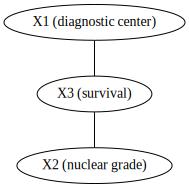

In [22]:
from graphviz import Graph

g = Graph()

g.edge('X1 (diagnostic center)', 'X3 (survival)')
g.edge('X3 (survival)', 'X2 (nuclear grade)')

g

These results can be interpreted to mean that the nuclear grade is independent of the diagnostic center given the survival -- that is, no diagnostic center is more optimistic or pessimistic in its classification of tumors given their severity.